# 假设检验 hypothesis testing #

t检验（单样本、独立样本、配对样本），z检验，F(Levene)检验，卡方检验总结

In [1]:
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import numpy as np

## 数据集说明：diet_data ##
http://bbs.pinggu.org/thread-3112192-1-1.html

数据为一组人减肥前后（共4次，0-4）体重(wgt, weight)及甘油三酯(tg, triglyceride)的变化

In [2]:
diet_data_raw = pd.read_excel('dietstudy.xlsx')

In [3]:
diet_data_raw.head(10)

,patid,age,gender,tg0,tg1,tg2,tg3,tg4,wgt0,wgt1,wgt2,wgt3,wgt4
0,1,45,0,180,148,106,113,100,198,196,193,188,192
1,2,56,0,139,94,119,75,92,237,233,232,228,225
2,3,50,0,152,185,86,149,118,233,231,229,228,226
3,4,46,1,112,145,136,149,82,179,181,177,174,172
4,5,64,0,156,104,157,79,97,219,217,215,213,214
5,6,49,1,167,138,88,107,171,169,166,165,162,161
6,7,63,0,138,132,146,143,132,222,219,215,215,210
7,8,63,1,160,128,150,118,123,167,167,166,162,161
8,9,52,0,107,120,129,195,174,199,200,196,196,193
9,10,45,0,156,103,126,135,92,233,229,229,229,226


## 计算协方差矩阵 ##
通过计算协方差矩阵，得出减肥前后体重的相关性极高，符合常识

**另：pandas的corr()和scipy的pearsonr均为计算相关系数功能，如下语句所示**

In [4]:
diet_data_raw.iloc[:,3:].corr()

,tg0,tg1,tg2,tg3,tg4,wgt0,wgt1,wgt2,wgt3,wgt4
tg0,1.000000,0.287259,-0.120345,-0.168348,-0.286191,0.218879,0.198834,0.206769,0.190822,0.210045
tg1,0.287259,1.000000,-0.485445,0.381669,-0.139500,0.073769,0.108662,0.080385,0.074311,0.088147
tg2,-0.120345,-0.485445,1.000000,0.120182,-0.159133,-0.214562,-0.213536,-0.208523,-0.196153,-0.203012
tg3,-0.168348,0.381669,0.120182,1.000000,0.183700,-0.001909,0.029734,0.017078,0.042876,0.033500
tg4,-0.286191,-0.139500,-0.159133,0.183700,1.000000,-0.347885,-0.357332,-0.349883,-0.339228,-0.354188
wgt0,0.218879,0.073769,-0.214562,-0.001909,-0.347885,1.000000,0.997385,0.998544,0.997473,0.996287
wgt1,0.198834,0.108662,-0.213536,0.029734,-0.357332,0.997385,1.000000,0.998594,0.996932,0.996926
wgt2,0.206769,0.080385,-0.208523,0.017078,-0.349883,0.998544,0.998594,1.000000,0.998492,0.998443
wgt3,0.190822,0.074311,-0.196153,0.042876,-0.339228,0.997473,0.996932,0.998492,1.000000,0.997948
wgt4,0.210045,0.088147,-0.203012,0.033500,-0.354188,0.996287,0.996926,0.998443,0.997948,1.000000


In [5]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
corr, corr_pvalue = scipy.stats.pearsonr(diet_data_raw.wgt0, diet_data_raw.wgt1)
print('wgt0-wgt1相关系数：%s' %corr)

wgt0-wgt1相关系数：0.9973847074503478


## 方差齐性检验 ##
t检验的前提条件是两样本独立、正态、【方差齐】， 故在进行t检验前，需要先通过方差齐性检验
方差齐性检验的典型模型有：F检验、Levene检验、 Bartlett检验、Brown–Forsythe检验
F检验对于数据的正态性非常敏感，因此在检验方差齐性的时候，Levene检验, Bartlett检验或者Brown–Forsythe检验的稳健性都要优于F检验，本例使用Levene检验

**总结：方差齐性检验用于检查不同样本的总体方差是否相同，若相同可以继续进行t检验** 

**结论：未能通过方差齐性检验，非方差齐性**

In [6]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
tg_levene, tg_levene_pvalue = scipy.stats.levene(diet_data_raw.tg0, diet_data_raw.tg4)
print('tg前后方差齐性检验：%s, P值：%s' %(tg_levene, tg_levene_pvalue))
wgt_levene, wgt_levene_pvalue = scipy.stats.levene(diet_data_raw.wgt0, diet_data_raw.wgt4)
print('wgt前后方差齐性检验：%s, P值：%s' %(wgt_levene, wgt_levene_pvalue))

tg前后方差齐性检验：0.0032347943102124612, P值：0.9550216975818979
wgt前后方差齐性检验：0.0030093651443291523, P值：0.9566155575196731


## 正态性检验 ##
t检验的前提条件是两样本独立、【正态】、方差齐

分别通过scipy和statsmodels绘制正态概率图/QQ图

Text(0.5,1,'Probplot of diet data weight')

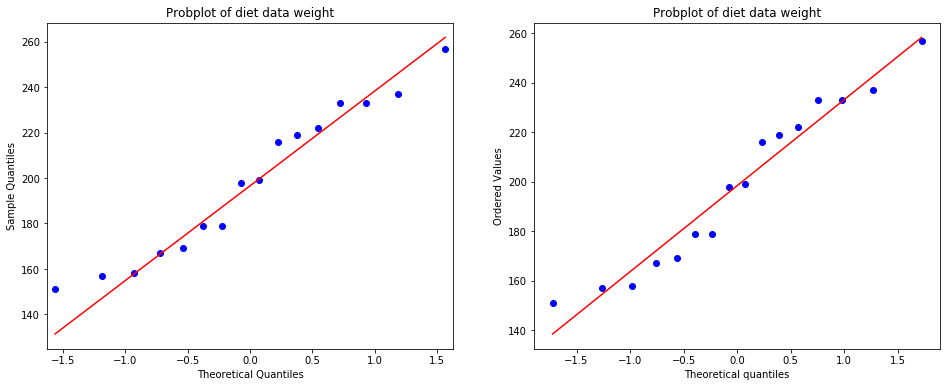

In [7]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
statsmodels.graphics.gofplots.qqplot(diet_data_raw.wgt0, line='q', ax=ax1)    # 当参数fit=True时y轴转换为(-2,2)
ax1.set_title("Probplot of diet data weight")
scipy.stats.probplot(diet_data_raw.wgt0, plot=ax2)
ax2.set_title("Probplot of diet data weight")

## 配对样本t检验 ##
### 用于对同一个数据前后变化是否明显的假设检验，如某班学生经过一次考试后，下次考试的成绩对比 ###

---

分别使用scipy和statsmodels对减肥前后的单因素(weight, tg)进行配对t检验，

<font color=red>**拒绝体重无变化的假设，体重有变化；**</font>

<font color=red>**接受甘油三酯无变化的假设，认为甘油三酯无明显变化**</font>

---

注：statsmodels的ttost，指两个样本均值不同时的假设，零假设为前者减后者之差小于low或大于upp，  
如：复习后考试成绩比不复习要高5-15分，即low=5， upp=15

http://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttost_ind.html  
null hypothesis: m1 - m2 < low or m1 - m2 > upp alternative hypothesis: low < m1 - m2 < upp

**当low=0, upp=0时转换为两个样本均值相同的假设**

In [8]:
t_paired_scipy_wgt, t_paired_scipy_wgt_pvalue = scipy.stats.ttest_rel(diet_data_raw.wgt0, diet_data_raw.wgt4)
t_paired_scipy_tg, t_paired_scipy_tg_pvalue = scipy.stats.ttest_rel(diet_data_raw.tg0, diet_data_raw.tg4)
t_paired_sm_wgt= statsmodels.stats.weightstats.ttost_paired(diet_data_raw.wgt0, diet_data_raw.wgt4, low=0, upp=0)
t_paired_sm_tg = statsmodels.stats.weightstats.ttost_paired(diet_data_raw.tg0, diet_data_raw.tg4, low=0, upp=0)
print('配对T检验weight值为:\n%s(scipy)\n%s(sm)\nP-Value:%s\n\n配对T检验tg值为:\n%s(scipy)\n%s(sm)\nP-Value:%s'%
      (t_paired_scipy_wgt,t_paired_sm_wgt[1][0],t_paired_scipy_wgt_pvalue,
       t_paired_scipy_tg,t_paired_sm_tg[1][0],t_paired_scipy_tg_pvalue))

配对T检验weight值为:
11.174521688532522(scipy)
11.174521688532522(sm)
P-Value:1.137689414996614e-08

配对T检验tg值为:
1.2000008533342437(scipy)
1.2000008533342437(sm)
P-Value:0.24874946576903698


## 单样本均值假设检验 ##
### 验证某个样本的均值是否等于某个数值的假设检验 ###

t检验和z检验都要求样本为正态或近似正态分布，且方差近似齐性（故须先做方差齐性检验）  
t检验可用于总体标准差未知的情况，z检验用于总体标准差已知的情况  
当样本数量>30时可用样本标准差代替总体标准差，故可以使用z检验（此时数据应为抽样样本）  
http://bbs.pinggu.org/thread-812203-1-1.html  

---

**结果：生成的高斯分布样本未能拒绝零假设（mean=0），满足均值为0的假设**

In [9]:
np.random.seed(5)
ran = np.random.randn(50000)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
ttest_mean, ttest_mean_pvalue = scipy.stats.ttest_1samp(ran, 0)

# http://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html
ztest_mean = statsmodels.stats.weightstats.ztest(ran, value=0)

print('单样本均值等于0的t假设：%s, P-Value:%s\n\n单样本均值等于0的z假设：%s, P-Value:%s' %(ttest_mean, ttest_mean_pvalue, ztest_mean[0], ztest_mean[1]))

单样本均值等于0的t假设：0.5397264138912574, P-Value:0.5893881248058216

单样本均值等于0的z假设：0.5397264138912574, P-Value:0.5893857211972843


## 两独立样本t检验 ##
### 用于判断处于一个总体里的两个样本是否满足为同分布，如男女差别等 ###

---

## 样本说明：brain_size ##  
该样本为不同人大脑情况的数据，有重量、性别、IQ等

In [10]:
brain_data_raw = pd.read_csv('brain_size.csv', delimiter=';', usecols=[1,2,3,4,5,6,7])
brain_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
Gender       40 non-null object
FSIQ         40 non-null int64
VIQ          40 non-null int64
PIQ          40 non-null int64
Weight       40 non-null object
Height       40 non-null object
MRI_Count    40 non-null int64
dtypes: int64(4), object(3)
memory usage: 2.3+ KB


In [11]:
record_notvalue = brain_data_raw.iloc[:,[4,5]].isin({'Weight': ['.'], 'Height': ['.']})
record_notvalue = record_notvalue.Weight | record_notvalue.Height
brain_data = brain_data_raw[-record_notvalue]
brain_data.head(10)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545
5,Female,99,90,110,146,69.0,928799
6,Female,138,136,131,138,64.5,991305
7,Female,92,90,98,175,66.0,854258
8,Male,89,93,84,134,66.3,904858
9,Male,133,114,147,172,68.8,955466
10,Female,132,129,124,118,64.5,833868


In [12]:
# 按照性别分类，保留重量数据
brain_male_weight = brain_data[brain_data['Gender']=='Male'].loc[:,'Weight'].astype('float')
brain_female_weight = brain_data[brain_data['Gender']=='Female'].loc[:,'Weight'].astype('float')

# 方差齐次检验
brain_weight_levene, brain_weight_levene_pvalue = scipy.stats.levene(brain_male_weight, brain_female_weight)
print('brain_weight前后方差齐性检验：%s, P值：%s' %(brain_weight_levene, brain_weight_levene_pvalue))

brain_weight前后方差齐性检验：0.8323315488861788, P值：0.3676685564235427


In [13]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
brain_weight_ttest_scipy = scipy.stats.ttest_ind(brain_male_weight, brain_female_weight)

# http://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html
brain_weight_ttest_sm = statsmodels.stats.weightstats.ttest_ind(brain_male_weight, brain_female_weight)


# 当未通过方差齐次检验时，使用Welch's t-test即t'检验进行校正
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
brain_weight_ttest_notequalvar_scipy = scipy.stats.ttest_ind(brain_male_weight, brain_female_weight, equal_var=False)
brain_weight_ttest_notequalvar_sm = statsmodels.stats.weightstats.ttest_ind(brain_male_weight, brain_female_weight)

In [14]:
print('独立样本t检验(scipy)：%s, P-Value:%s\n\n独立样本t检验(sm)：%s, P-Value:%s\n\n自由度:%s' %(brain_weight_ttest_scipy[0], brain_weight_ttest_scipy[1], brain_weight_ttest_sm[0], brain_weight_ttest_sm[1], brain_weight_ttest_sm[2]))

独立样本t检验(scipy)：4.870950921940696, P-Value:2.227293018362118e-05

独立样本t检验(sm)：4.870950921940696, P-Value:2.227293018362118e-05

自由度:36.0


## 卡方检验 ##
### 卡方检验是以χ2分布为基础的一种常用假设检验方法，它的无效假设H0是：观察频数与期望频数没有差别 ### 
主要是比较两个及两个以上样本率( 构成比）以及两个分类变量的关联性分析。其根本思想就是在于比较理论频数和实际频数的吻合程度或拟合优度问题。


该检验的基本思想是：首先假设H0成立，基于此前提计算出χ2值，它表示观察值与理论值之间的偏离程度。根据χ2分布及自由度可以确定在H0假设成立的情况下获得当前统计量及更极端情况的概率P。如果P值很小，说明观察值与理论值偏离程度太大，应当拒绝无效假设，表示比较资料之间有显著差异；否则就不能拒绝无效假设，尚不能认为样本所代表的实际情况和理论假设有差别。

### 应用场景 ###

<li>适合度检验</li>
<li>独立性检验</li>
<li>统一性检验</li>

https://wiki.mbalib.com/wiki/%E5%8D%A1%E6%96%B9%E6%A3%80%E9%AA%8C  